# Predicting Terrorist Attacks

### Time series prediction

#### Date : August 31, 2018

#### Notebook Configuration

In [102]:
import time
import collections

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [103]:
# Display up to 150 rows and columns
pd.set_option('display.max_rows', 220)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))

#### Load the Datasets
Load the dataset created by the preprocessing-2 notebook.

In [104]:
gtd_df = pd.read_csv("dataset/processed_2_globalterrorismdb_0718dist.csv" ,encoding='ISO-8859-1')

#### Inspect the Structure
The cleansed data frame contains 50 attributes, one of which is used for the data frame index, and 177132 observations.

In [105]:
# Display a summary of the data frame# Displa 
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177132 entries, 0 to 177131
Data columns (total 50 columns):
Unnamed: 0          177132 non-null int64
iyear               177132 non-null int64
imonth              177132 non-null int64
iday                177132 non-null int64
country_txt         177132 non-null object
region_txt          177132 non-null object
provstate           177132 non-null object
city                177132 non-null object
latitude            177132 non-null float64
longitude           177132 non-null float64
specificity         177132 non-null float64
summary             177132 non-null object
attacktype1_txt     177132 non-null object
targtype1_txt       177132 non-null object
targsubtype1_txt    177132 non-null object
corp1               177132 non-null object
target1             177132 non-null object
natlty1_txt         177132 non-null object
gname               177132 non-null object
nperpcap            177132 non-null float64
weaptype1_txt       177132 no

#### Deleting Column
Delet unnamded

In [106]:
gtd_df.drop(gtd_df.columns[[0]], axis=1, inplace=True)

#### Inspect the Structure
The cleansed data frame contains 49 attributes, one of which is used for the data frame index, and 177132  observations.

In [107]:
# Display a summary of the data frame# Displa 
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177132 entries, 0 to 177131
Data columns (total 49 columns):
iyear               177132 non-null int64
imonth              177132 non-null int64
iday                177132 non-null int64
country_txt         177132 non-null object
region_txt          177132 non-null object
provstate           177132 non-null object
city                177132 non-null object
latitude            177132 non-null float64
longitude           177132 non-null float64
specificity         177132 non-null float64
summary             177132 non-null object
attacktype1_txt     177132 non-null object
targtype1_txt       177132 non-null object
targsubtype1_txt    177132 non-null object
corp1               177132 non-null object
target1             177132 non-null object
natlty1_txt         177132 non-null object
gname               177132 non-null object
nperpcap            177132 non-null float64
weaptype1_txt       177132 non-null object
weapsubtype1_txt    177132 n

#### Convert Attributes to Correct Data Type
Convert a subset of the data frame attributes to categorical, datatime and string to align with the GTD code book as executed previously in the EDA notebook.

In [108]:
# List of attributes that are categorical# List o 
cat_attrs = ['extended_txt', 'country_txt', 'region_txt', 'specificity', 'vicinity_txt',
             'crit1_txt', 'crit2_txt', 'crit3_txt', 'doubtterr_txt', 'multiple_txt',
             'success_txt', 'suicide_txt', 'attacktype1_txt', 'targtype1_txt', 
             'targsubtype1_txt', 'natlty1_txt', 'guncertain1_txt', 'individual_txt', 
             'claimed_txt', 'weaptype1_txt', 'weapsubtype1_txt', 'property_txt', 
             'ishostkid_txt', 'INT_LOG_txt', 'INT_IDEO_txt','INT_MISC_txt', 'INT_ANY_txt']

for cat in cat_attrs:
    gtd_df[cat] = gtd_df[cat].astype('category')

# Data time feature added during EDA
gtd_df['incident_date'] = pd.to_datetime(gtd_df['incident_date'])

# Necessary for single data type
gtd_df['gname'] = gtd_df['gname'].astype('str')
    
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177132 entries, 0 to 177131
Data columns (total 49 columns):
iyear               177132 non-null int64
imonth              177132 non-null int64
iday                177132 non-null int64
country_txt         177132 non-null category
region_txt          177132 non-null category
provstate           177132 non-null object
city                177132 non-null object
latitude            177132 non-null float64
longitude           177132 non-null float64
specificity         177132 non-null category
summary             177132 non-null object
attacktype1_txt     177132 non-null category
targtype1_txt       177132 non-null category
targsubtype1_txt    177132 non-null category
corp1               177132 non-null object
target1             177132 non-null object
natlty1_txt         177132 non-null category
gname               177132 non-null object
nperpcap            177132 non-null float64
weaptype1_txt       177132 non-null category
weapsubtype1_

#### Drop Text Attributes
Remove the text attributes, which will not be used in the models.

In [109]:
gtd_df = gtd_df.drop(['provstate', 'city', 'summary', 'corp1', 'target1',
                                  'scite1', 'dbsource'], axis=1)

gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177132 entries, 0 to 177131
Data columns (total 42 columns):
iyear               177132 non-null int64
imonth              177132 non-null int64
iday                177132 non-null int64
country_txt         177132 non-null category
region_txt          177132 non-null category
latitude            177132 non-null float64
longitude           177132 non-null float64
specificity         177132 non-null category
attacktype1_txt     177132 non-null category
targtype1_txt       177132 non-null category
targsubtype1_txt    177132 non-null category
natlty1_txt         177132 non-null category
gname               177132 non-null object
nperpcap            177132 non-null float64
weaptype1_txt       177132 non-null category
weapsubtype1_txt    177132 non-null category
weapdetail          177132 non-null object
nkill               177132 non-null float64
nkillus             177132 non-null float64
nkillter            177132 non-null float64
nwound  

#### Standardize the Numeric Attributes
Adjust for differences in the range of the numeric attributes.

In [110]:
scaler = preprocessing.StandardScaler()

# List of numeric attributes
scale_attrs = ['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']

# Normalize the attributes in place
gtd_df[scale_attrs] = scaler.fit_transform(gtd_df[scale_attrs])

# View the transformation
gtd_df[scale_attrs].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nperpcap,177132.0,2.149726e-14,1.000003,-0.048167,-0.048167,-0.048167,-0.048167,250.345724
nkill,177132.0,3.443280e-14,1.000003,-0.199724,-0.199724,-0.199724,-0.020699,140.335128
nkillus,177132.0,-9.569497e-16,1.000003,-0.006480,-0.006480,-0.006480,-0.006480,294.338413
nkillter,177132.0,-6.238176e-14,1.000003,-0.096638,-0.096638,-0.096638,-0.096638,147.673324
nwound,177132.0,4.502412e-15,1.000003,-0.083879,-0.083879,-0.083879,-0.026282,235.803954
nwoundus,177132.0,5.573612e-15,1.000003,-0.010315,-0.010315,-0.010315,-0.010315,302.240590
nwoundte,177132.0,4.465158e-14,1.000003,-0.057117,-0.057117,-0.057117,-0.057117,168.424688


#### Indonesia
Subset the data to the last 10 year of events in Indonesia.

In [111]:
ind_df = gtd_df[gtd_df['country_txt'] == "Indonesia"].query('2007<iyear<=2017')

ind_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 83175 to 176780
Data columns (total 42 columns):
iyear               237 non-null int64
imonth              237 non-null int64
iday                237 non-null int64
country_txt         237 non-null category
region_txt          237 non-null category
latitude            237 non-null float64
longitude           237 non-null float64
specificity         237 non-null category
attacktype1_txt     237 non-null category
targtype1_txt       237 non-null category
targsubtype1_txt    237 non-null category
natlty1_txt         237 non-null category
gname               237 non-null object
nperpcap            237 non-null float64
weaptype1_txt       237 non-null category
weapsubtype1_txt    237 non-null category
weapdetail          237 non-null object
nkill               237 non-null float64
nkillus             237 non-null float64
nkillter            237 non-null float64
nwound              237 non-null float64
nwoundus            237 no

#### Attacks per Day
Calculate the number of attacks per day.

In [112]:
# Group by incident_date
ind_counts = ind_df.groupby(['incident_date'], as_index = False).count()

# Select incident_date and a column for the counts
ind_counts = ind_counts[['incident_date', 'iyear']]
ind_counts.columns = ['incident_date','daily_attacks']
ind_counts.head()

,incident_date,daily_attacks
0,2008-06-02,1
1,2008-06-15,1
2,2008-07-31,2
3,2008-09-09,1
4,2008-09-11,1


#### Reindex and Fill
Reindex the dataframe to include all days for the 10 year period and fill added days with zero.

In [113]:
idx = pd.date_range('2008-01-01', '2017-12-31')

ind_ts = ind_counts.set_index('incident_date')

ind_ts = ind_ts.reindex(idx, fill_value=0)
ind_ts.head()

,daily_attacks
2008-01-01,0
2008-01-02,0
2008-01-03,0
2008-01-04,0
2008-01-05,0


#### Summary Statistics
Display summary statistics on the time series dataframe.

In [114]:
ind_ts.describe()

,daily_attacks
count,3653.000000
mean,0.064878
std,0.296762
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4.000000


#### Daily Plot - Total Attacks

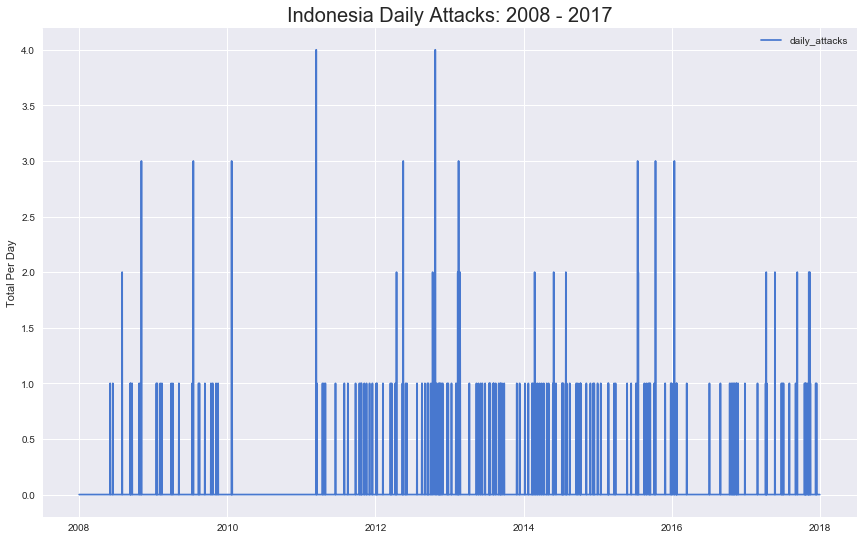

In [115]:
ind_ts.plot()
plt.title('Indonesia Daily Attacks: 2008 - 2017', fontsize=20);
plt.ylabel('Total Per Day')
plt.show();

#### Weekly Plot - Average Attacks
Weekly average using the resampled daily data.

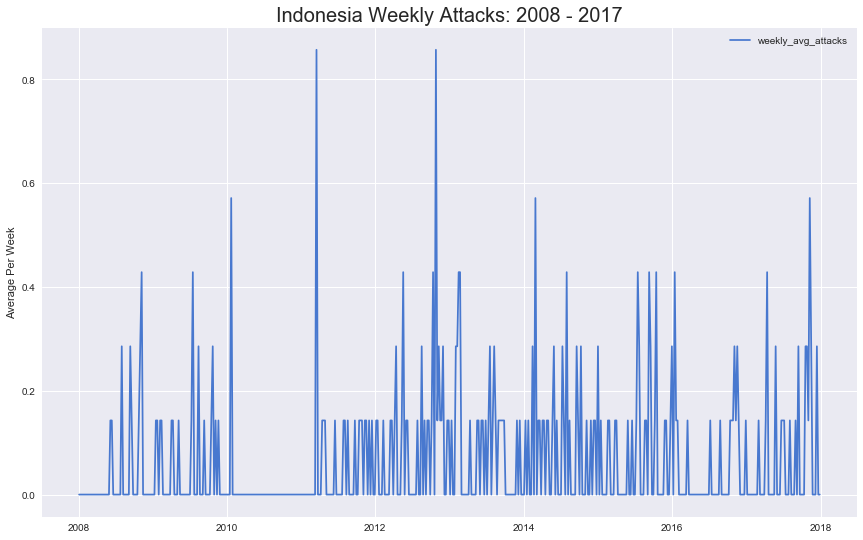

In [116]:
weekly_summary = pd.DataFrame()
weekly_summary['weekly_avg_attacks'] = ind_ts.daily_attacks.resample('W').mean()

weekly_summary.plot()
plt.title('Indonesia Weekly Attacks: 2008 - 2017', fontsize=20);
plt.ylabel('Average Per Week')
plt.show();

#### Monthly Plot - Average Attacks
Monthly average using the resampled daily data.

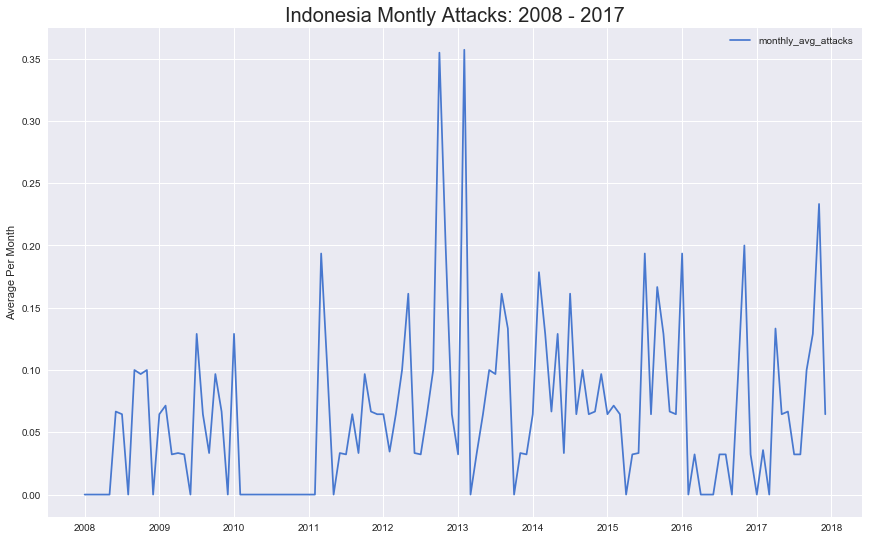

In [117]:
monthly_summary = pd.DataFrame()
monthly_summary['monthly_avg_attacks'] = ind_ts.daily_attacks.resample('M').mean()

monthly_summary.plot()
plt.title('Indonesia Montly Attacks: 2008 - 2017', fontsize=20);
plt.ylabel('Average Per Month')
plt.show();

#### Exponential Weighted Moving Average
Apply smoothing using exponential weighted moving average.

In [118]:
# Use a 30 day span for averaging
ind_ewm = ind_ts.ewm(span=30, adjust=False).mean()

ind_ewm.head()

,daily_attacks
2008-01-01,0.0
2008-01-02,0.0
2008-01-03,0.0
2008-01-04,0.0
2008-01-05,0.0


#### Exponential Weighted Moving Average
Daily attacks in Indonesia, 2008 to 2017.

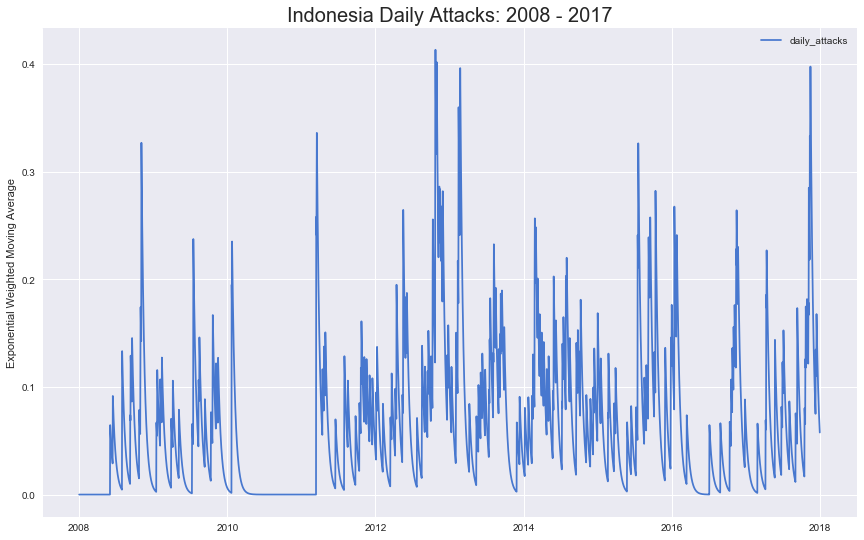

In [119]:
ind_ewm.plot()
plt.title('Indonesia Daily Attacks: 2008 - 2017', fontsize=20);
plt.ylabel('Exponential Weighted Moving Average')
plt.show();

#### Facebook Prophet
Create a modified dataset to comply with the Facebook Prophet requirements.

In [136]:
import fbprophet

ind_fb = ind_ts.copy()
ind_fb['index1'] = ind_fb.index
ind_fb.columns = ['y', 'ds']

ind_fb.head()

,y,ds
2008-01-01,0,2008-01-01
2008-01-02,0,2008-01-02
2008-01-03,0,2008-01-03
2008-01-04,0,2008-01-04
2008-01-05,0,2008-01-05


#### Indonesia Holidays
Indonesia regional and national holidays covering 2008 - 2018.

In [137]:
# Load the preprocessed GTD dataset
ind_holidays = pd.read_csv("dataset/ind-holidays.csv" ,encoding='ISO-8859-1')
ind_holidays.head()

,ds,holiday
0,1/1/2007,New Year Day
1,2/16/2007,Chinese New Year
2,3/28/2007,Hari Raya Nyepi (Tahun Baru Saka)
3,3/30/2007,Wafat Isa Al-Masih
4,4/13/2007,Lailat al-Miraj or Isra and Miraj


Time Series Model
Create the time serie model for attacks in Indonesia and factor in Indonesia holidays.

In [139]:
# Make the prophet model and fit on the data# Make t 
prophet1 = fbprophet.Prophet(changepoint_prior_scale=0.15, holidays=ind_holidays)
prophet1.fit(ind_fb)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Predict 1 Year of Future Dates
Predict 365 days after last the data point of 2018-12-31.

In [140]:
# Specify 365 days out to predict
future_data = prophet1.make_future_dataframe(periods=365, freq = 'D')

# Predict the values
forecast_data = prophet1.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#forecast_data.tail()

,ds,yhat,yhat_lower,yhat_upper
4013,2018-12-27,0.079735,-0.324655,0.444994
4014,2018-12-28,0.060823,-0.299886,0.424829
4015,2018-12-29,0.035282,-0.313820,0.407612
4016,2018-12-30,0.056293,-0.320116,0.424611
4017,2018-12-31,0.090660,-0.267765,0.471546


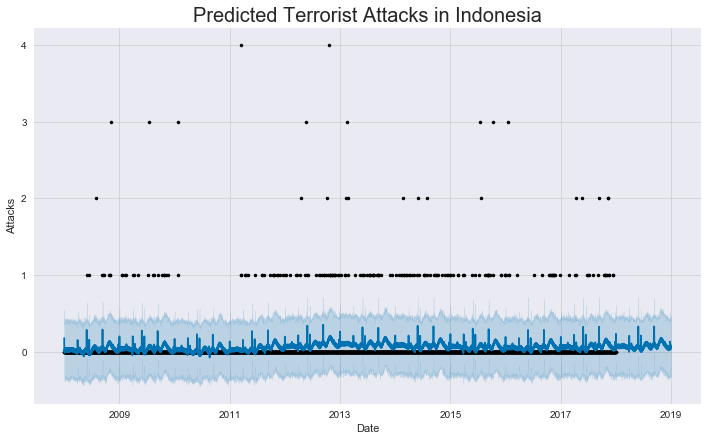

In [141]:
prophet1.plot(forecast_data, xlabel = 'Date', ylabel = 'Attacks')
plt.title('Predicted Terrorist Attacks in Indonesia', fontsize=20);
plt.show();

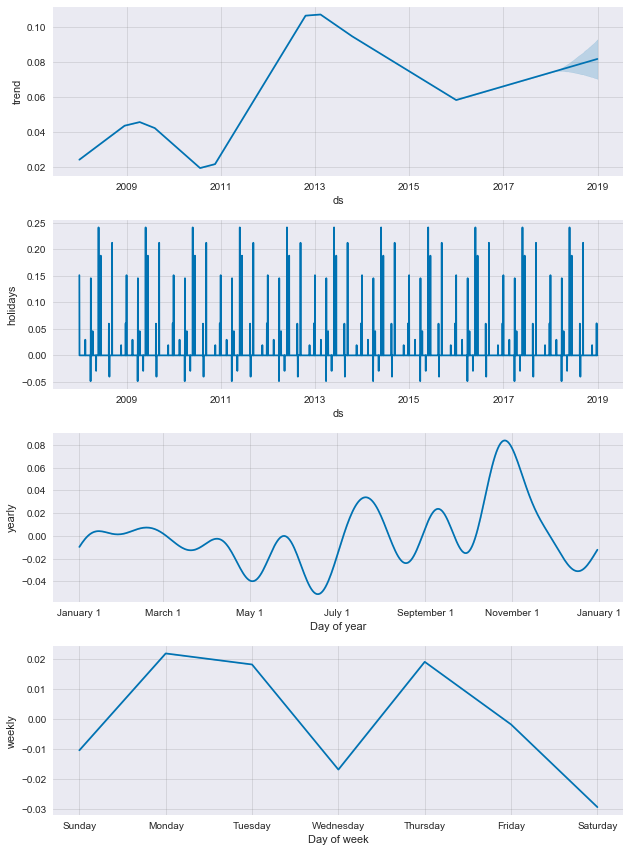

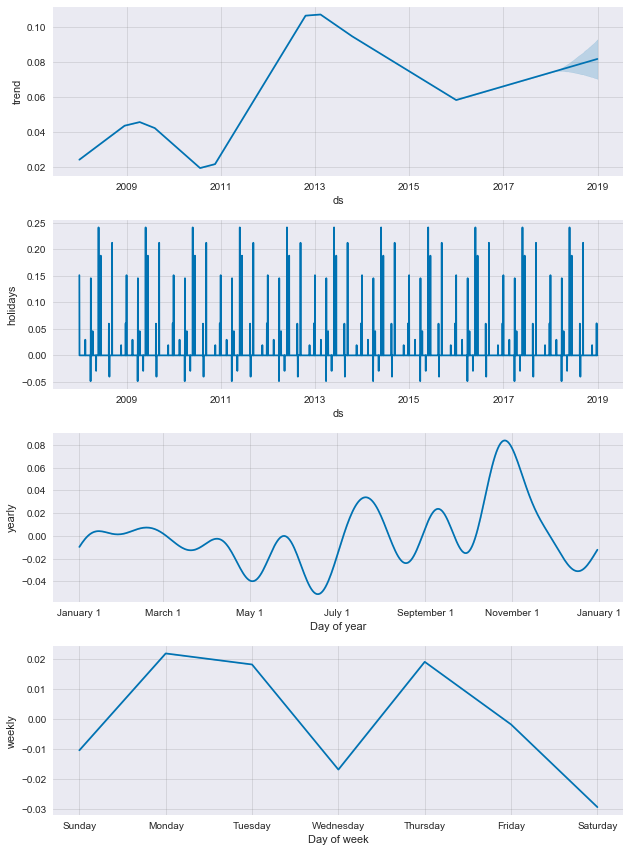

In [142]:
prophet1.plot_components(forecast_data)

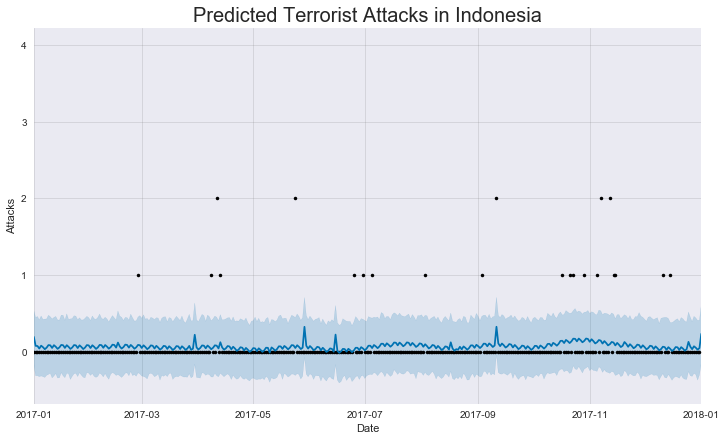

In [174]:
prophet1.plot(forecast_data, xlabel = 'Date', ylabel = 'Attacks')
plt.title('Predicted Terrorist Attacks in Indonesia', fontsize=20);
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2018-01-01'))
plt.show();

In [182]:
future3 = prophet1.make_future_dataframe(periods=360)
forecast3 = prophet1.predict(future3)
forecast3["Sessions"] = np.exp(forecast3.yhat).round()
forecast3["Sessions_lower"] = np.exp(forecast3.yhat_lower).round()
forecast3["Sessions_upper"] = np.exp(forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "10-1-2018") &
          (forecast3.ds < "11-30-2018")][["ds", "yhat", "Sessions_lower",
                                        "Sessions", "Sessions_upper"]]

,ds,yhat,Sessions_lower,Sessions,Sessions_upper
3927,2018-10-02,0.084126,1.0,1.0,2.0
3928,2018-10-03,0.050796,1.0,1.0,1.0
3929,2018-10-04,0.089060,1.0,1.0,2.0
3930,2018-10-05,0.071102,1.0,1.0,2.0
3931,2018-10-06,0.047015,1.0,1.0,2.0
3932,2018-10-07,0.069973,1.0,1.0,2.0
3933,2018-10-08,0.106760,1.0,1.0,2.0
3934,2018-10-09,0.107971,1.0,1.0,2.0
3935,2018-10-10,0.078163,1.0,1.0,2.0
3936,2018-10-11,0.119608,1.0,1.0,2.0
